<a href="https://colab.research.google.com/github/jumanjy26/jumanjy26/blob/main/assesment1_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**
The goal of this project is to predict whether a patient will attend or miss their scheduled appointment, using various features such as patient age, appointment time, and no-show status.
Datasets
# **The project uses three datasets:**
1.	Appointments Dataset: Holds information on appointment schedules, including patient ID, appointment status, time slots, etc.
2.	Patients Dataset: Holds demographic details about the patients, such as age, sex, and insurance.
3.	Slots Dataset: Holds information about available time slots for appointments.

# **Exploratory Data Analysis (EDA)**
The purpose of EDA is to explore key features like:
1.	Patient Age Distribution: This will help us understand the age groups of patients attending and missing appointments.
2.	Appointment Time Slot Distribution: Helps us see the distribution of appointments across various times of the day.
3.	No-show Distribution: This will give insight into how many patients miss their appointments, which is our target variable.
We will perform basic visualizations like histograms and count plots to explore these features.

# **Preprocessing**
In this section, we will clean the data by:
*   Managing missing values.
*   Encoding categorical features (like status and sex).
*	  Creating new features such as days until appointment.



# **Importing Required Libraries**

In [18]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Load Data**





In [ ]:
# Load Data
appointments_df = pd.read_csv('appointments.csv')  # Update the filename if needed
slots_df = pd.read_csv('slots.csv')
patients_df = pd.read_csv('patients.csv')

# **EDA**

Appointments Dataset:
   appointment_id  slot_id scheduling_date appointment_date appointment_time  \
0             138        1      28/12/2014       01/01/2015         08:00:00   
1             146       23      29/12/2014       01/01/2015         13:30:00   
2              21       24      17/12/2014       01/01/2015         13:45:00   
3             233       25      31/12/2014       01/01/2015         14:00:00   
4              90       26      26/12/2014       01/01/2015         14:15:00   

   scheduling_interval          status check_in_time  appointment_duration  \
0                    4  did not attend           NaN                   NaN   
1                    3  did not attend           NaN                   NaN   
2                   15        attended      13:36:45                   5.2   
3                    1        attended      13:59:32                  28.9   
4                    6       cancelled           NaN                   NaN   

  start_time  end_time  wait

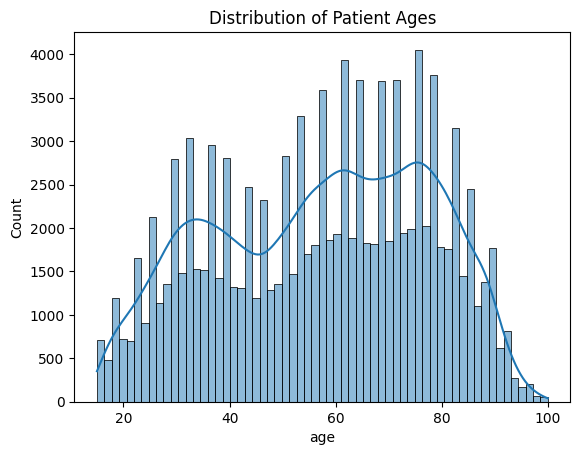

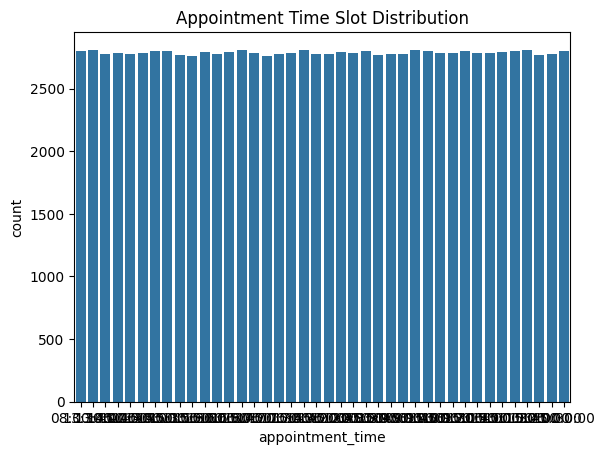

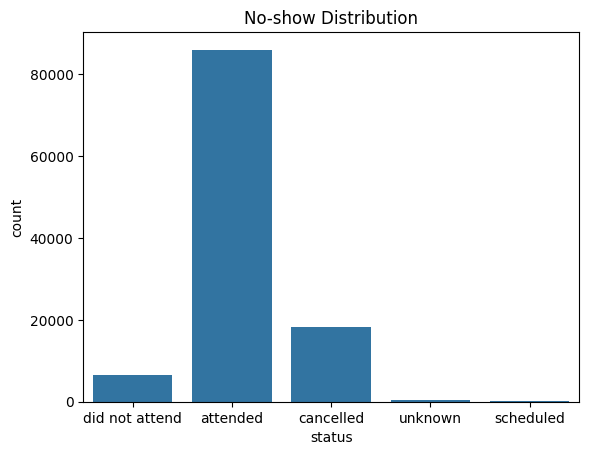

Training data shape: (89190, 17)
Test data shape: (22298, 17)


In [ ]:
# Display the first few rows of each dataset to understand their structure
print("Appointments Dataset:")
print(appointments_df.head())

print("\nSlots Dataset:")
print(slots_df.head())

print("\nPatients Dataset:")
print(patients_df.head())

# Checking for Missing Values
print("\nMissing values in appointments dataset:")
print(appointments_df.isnull().sum())

print("\nMissing values in slots dataset:")
print(slots_df.isnull().sum())

print("\nMissing values in patients dataset:")
print(patients_df.isnull().sum())

# Exploratory Data Analysis (EDA)

# Summary statistics for the appointments dataset
print("\nSummary statistics for appointments dataset:")
print(appointments_df.describe())

# Handle Missing Values in the 'age' column
# Fill missing values in the 'age' column with the median value
appointments_df['age'] = appointments_df['age'].fillna(appointments_df['age'].median())

# Plotting the distribution of patient ages
sns.histplot(appointments_df['age'], kde=True)
plt.title('Distribution of Patient Ages')
plt.show()

# Plotting the distribution of appointment time slots
sns.countplot(x='appointment_time', data=appointments_df)
plt.title('Appointment Time Slot Distribution')
plt.show()

# Distribution of no-shows (status)
sns.countplot(x='status', data=appointments_df)
plt.title('No-show Distribution')
plt.show()

# Preprocessing Data

# Handle Missing Data
# Fill missing values in numeric columns with the mean
numeric_cols = appointments_df.select_dtypes(include=['float64', 'int64']).columns
appointments_df[numeric_cols] = appointments_df[numeric_cols].fillna(appointments_df[numeric_cols].mean())

# Fill missing values in categorical columns (strings) with the mode (most frequent value)
categorical_cols = appointments_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    appointments_df[col] = appointments_df[col].fillna(appointments_df[col].mode()[0])

# Categorical Data Encoding (if necessary)
# One-Hot Encoding for categorical columns (example: sex, status)
appointments_df = pd.get_dummies(appointments_df, columns=['sex', 'status'])

# Label Encoding for 'age_group' (if necessary)
le = LabelEncoder()
appointments_df['age_group'] = le.fit_transform(appointments_df['age_group'])

# Feature Engineering - Create new features

# Convert 'appointment_date' to datetime format, specifying that the day comes before the month (DD/MM/YYYY format)
appointments_df['appointment_date'] = pd.to_datetime(appointments_df['appointment_date'], dayfirst=True)

# Create a new feature: 'days_until_appointment'
appointments_df['days_until_appointment'] = (appointments_df['appointment_date'] - pd.to_datetime('today')).dt.days

#Split Data into Training and Testing

# Drop the One-Hot Encoded 'status' columns and other non-feature columns (e.g., 'appointment_id', 'patient_id')
X = appointments_df.drop(['status_did not attend', 'status_attended', 'status_cancelled', 'appointment_id', 'patient_id'], axis=1)

# Use the 'status_attended' column as the target variable (1 for attended, 0 for did not attend)
y = appointments_df['status_attended']  # Assuming you want to predict whether a patient attended or not

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")



# **Modeling**

Appointments Dataset:
   appointment_id  slot_id scheduling_date appointment_date appointment_time  \
0             138        1      28/12/2014       01/01/2015         08:00:00   
1             146       23      29/12/2014       01/01/2015         13:30:00   
2              21       24      17/12/2014       01/01/2015         13:45:00   
3             233       25      31/12/2014       01/01/2015         14:00:00   
4              90       26      26/12/2014       01/01/2015         14:15:00   

   scheduling_interval          status check_in_time  appointment_duration  \
0                    4  did not attend           NaN                   NaN   
1                    3  did not attend           NaN                   NaN   
2                   15        attended      13:36:45                   5.2   
3                    1        attended      13:59:32                  28.9   
4                    6       cancelled           NaN                   NaN   

  start_time  end_time  wait

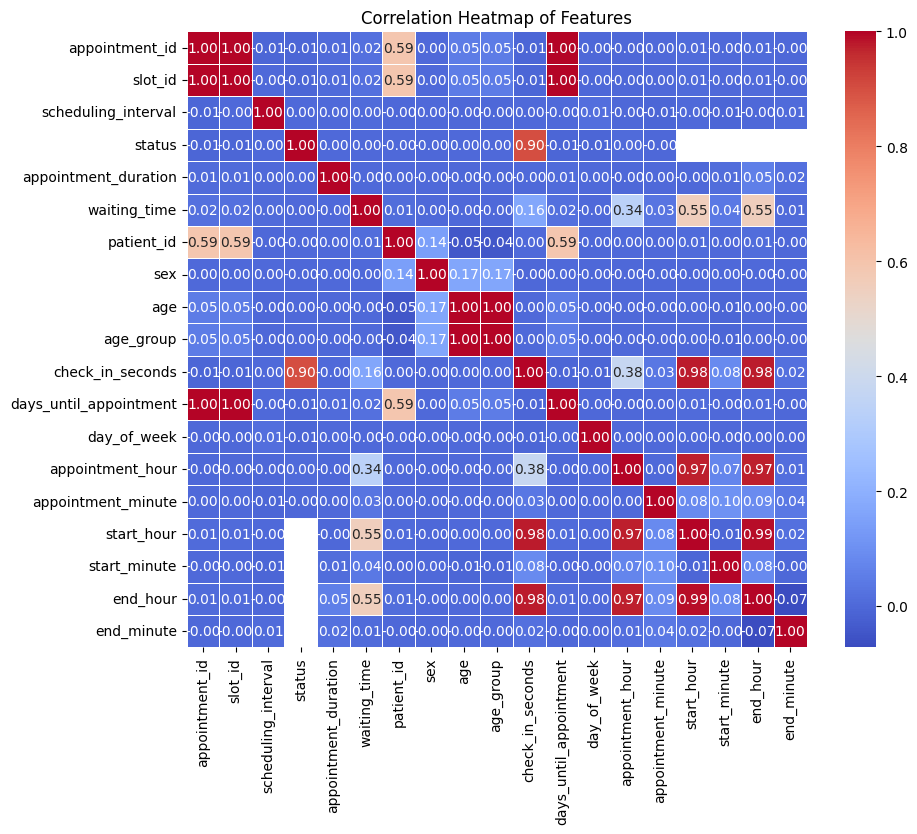

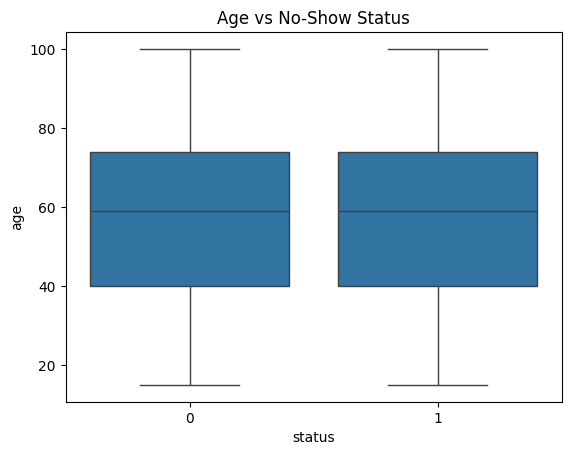

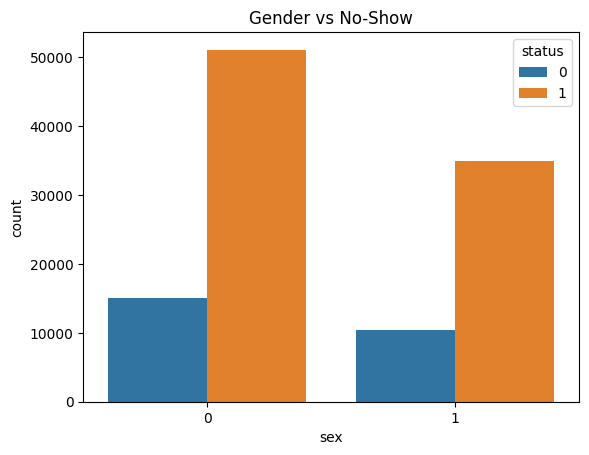

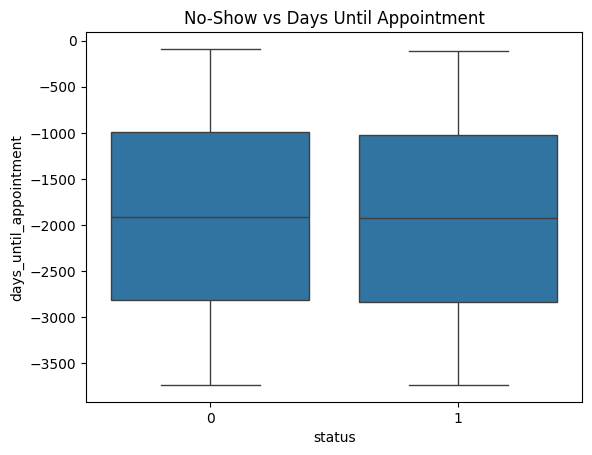

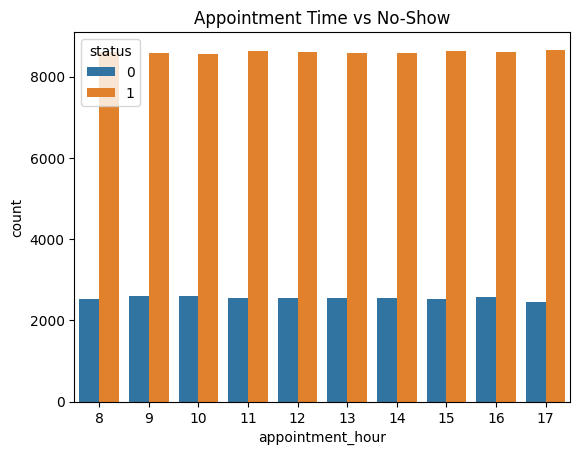

In [19]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load Data
appointments_df = pd.read_csv('appointments.csv')  # Update the filename if needed
slots_df = pd.read_csv('slots.csv')
patients_df = pd.read_csv('patients.csv')

# Display the first few rows of each dataset to understand their structure
print("Appointments Dataset:")
print(appointments_df.head())

print("\nSlots Dataset:")
print(slots_df.head())

print("\nPatients Dataset:")
print(patients_df.head())

# Handle Missing Values in the 'age' column
appointments_df['age'] = appointments_df['age'].fillna(appointments_df['age'].median())

# Fill missing values in other columns (for simplicity, filling with mean or median for numeric)
appointments_df['appointment_duration'] = appointments_df['appointment_duration'].fillna(appointments_df['appointment_duration'].mean())
appointments_df['waiting_time'] = appointments_df['waiting_time'].fillna(appointments_df['waiting_time'].mean())

# Fill 'check_in_time' with a default time (for simplicity, '00:00:00' if missing)
appointments_df['check_in_time'] = appointments_df['check_in_time'].fillna('00:00:00')

# Convert 'check_in_time' to seconds since midnight (for numeric representation)
appointments_df['check_in_seconds'] = pd.to_datetime(appointments_df['check_in_time'], format='%H:%M:%S').dt.hour * 3600 + pd.to_datetime(appointments_df['check_in_time'], format='%H:%M:%S').dt.minute * 60 + pd.to_datetime(appointments_df['check_in_time'], format='%H:%M:%S').dt.second

# Preprocessing Data
# Convert 'scheduling_date' and 'appointment_date' to datetime with dayfirst=True
appointments_df['scheduling_date'] = pd.to_datetime(appointments_df['scheduling_date'], dayfirst=True)
appointments_df['appointment_date'] = pd.to_datetime(appointments_df['appointment_date'], dayfirst=True)

# Create a new feature: 'days_until_appointment'
appointments_df['days_until_appointment'] = (appointments_df['appointment_date'] - pd.to_datetime('today')).dt.days

# Extract features like 'day of the week' (0=Monday, 6=Sunday)
appointments_df['day_of_week'] = appointments_df['scheduling_date'].dt.dayofweek

# Convert 'appointment_time', 'start_time', and 'end_time' to numeric features (hour and minute)
appointments_df['appointment_time'] = pd.to_datetime(appointments_df['appointment_time'], format='%H:%M:%S', errors='coerce')
appointments_df['start_time'] = pd.to_datetime(appointments_df['start_time'], format='%H:%M:%S', errors='coerce')
appointments_df['end_time'] = pd.to_datetime(appointments_df['end_time'], format='%H:%M:%S', errors='coerce')

# Extract hour and minute from 'appointment_time', 'start_time', and 'end_time'
appointments_df['appointment_hour'] = appointments_df['appointment_time'].dt.hour
appointments_df['appointment_minute'] = appointments_df['appointment_time'].dt.minute
appointments_df['start_hour'] = appointments_df['start_time'].dt.hour
appointments_df['start_minute'] = appointments_df['start_time'].dt.minute
appointments_df['end_hour'] = appointments_df['end_time'].dt.hour
appointments_df['end_minute'] = appointments_df['end_time'].dt.minute

# **Label Encoding for 'sex' and 'age_group' columns**
# Label encode the 'sex' column (Male = 0, Female = 1)
le = LabelEncoder()
appointments_df['sex'] = le.fit_transform(appointments_df['sex'])

# Label encode the 'age_group' column (this will assign numeric values to different age groups)
appointments_df['age_group'] = le.fit_transform(appointments_df['age_group'])

# **Encode the 'status' column**
# 'attended' = 1, others ('did not attend', 'cancelled') = 0
appointments_df['status'] = appointments_df['status'].apply(lambda x: 1 if x == 'attended' else 0)

# Drop the original 'scheduling_date', 'start_time', 'end_time', and 'appointment_date' columns
appointments_df = appointments_df.drop(['appointment_date', 'scheduling_date', 'start_time', 'end_time', 'appointment_time', 'check_in_time'], axis=1)

# Split data into features (X) and target (y)
X = appointments_df.drop(['appointment_id', 'patient_id'], axis=1)

# Target variable: 'status' (1 for attended, 0 for did not attend)
y = appointments_df['status']  # 'status' is already encoded

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Step 1: Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Step 2: Evaluate the Decision Tree Model
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

# Additional Graphs Based on the Assessment Guidelines

# Correlation Heatmap (Ensure only numeric columns)
correlation_matrix = appointments_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Age vs. No-Show (Boxplot)
sns.boxplot(x='status', y='age', data=appointments_df)
plt.title('Age vs No-Show Status')
plt.show()

# Gender vs. No-Show (Barplot)
sns.countplot(x='sex', hue='status', data=appointments_df)
plt.title('Gender vs No-Show')
plt.show()

# Days Until Appointment vs No-Show (Boxplot)
sns.boxplot(x='status', y='days_until_appointment', data=appointments_df)
plt.title('No-Show vs Days Until Appointment')
plt.show()

# Appointment Time vs No-Show (Barplot)
sns.countplot(x='appointment_hour', hue='status', data=appointments_df)
plt.title('Appointment Time vs No-Show')
plt.show()


# **Logistic Regression**

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Step 1: Handle missing values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Train the Logistic Regression Model on the imputed data
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train_imputed, y_train)

# Predict on the test data
y_pred_lr = lr_classifier.predict(X_test_imputed)

# Evaluate Logistic Regression Model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       1.00      1.00      1.00     17070

    accuracy                           1.00     22298
   macro avg       1.00      1.00      1.00     22298
weighted avg       1.00      1.00      1.00     22298

Confusion Matrix for Logistic Regression:
[[ 5228     0]
 [    0 17070]]


# **Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Step 2: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest Model
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       1.00      1.00      1.00     17070

    accuracy                           1.00     22298
   macro avg       1.00      1.00      1.00     22298
weighted avg       1.00      1.00      1.00     22298

Confusion Matrix for Random Forest:
[[ 5228     0]
 [    0 17070]]


# **Cross-validation**

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score


# Initialize SimpleImputer to fill NaNs with the mean value of each column
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)  # Apply imputer to the entire feature set

# Now, apply cross-validation to the imputed data
dt_cv_scores = cross_val_score(dt_classifier, X_imputed, y, cv=5)
lr_cv_scores = cross_val_score(lr_classifier, X_imputed, y, cv=5)
rf_cv_scores = cross_val_score(rf_classifier, X_imputed, y, cv=5)

# Print cross-validation scores
print(f"Cross-validation scores for Decision Tree: {dt_cv_scores}")
print(f"Cross-validation scores for Logistic Regression: {lr_cv_scores}")
print(f"Cross-validation scores for Random Forest: {rf_cv_scores}")

Cross-validation scores for Decision Tree: [1. 1. 1. 1. 1.]
Cross-validation scores for Logistic Regression: [1. 1. 1. 1. 1.]
Cross-validation scores for Random Forest: [1. 1. 1. 1. 1.]


# **Feature Importance (For Decision Tree and Random Forest)**

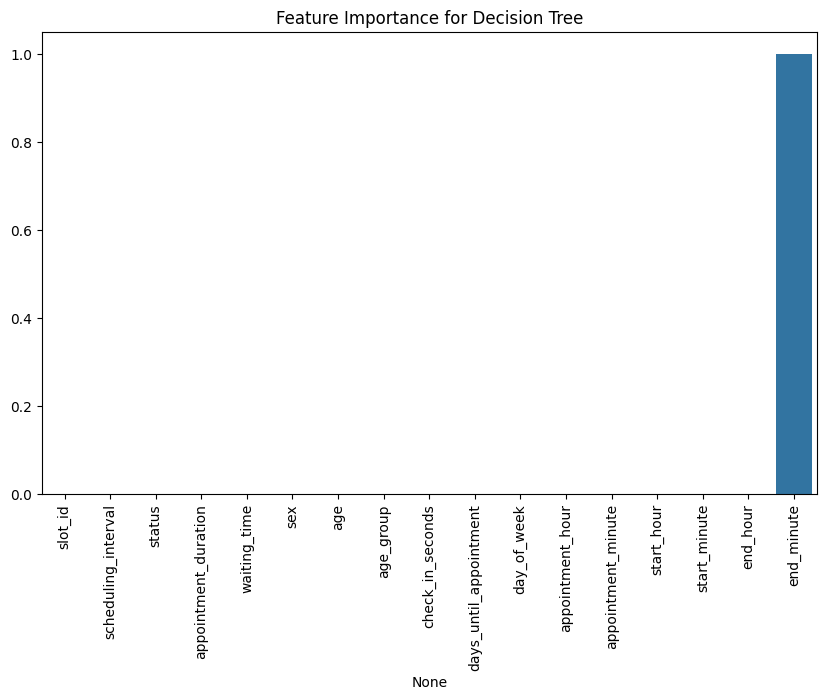

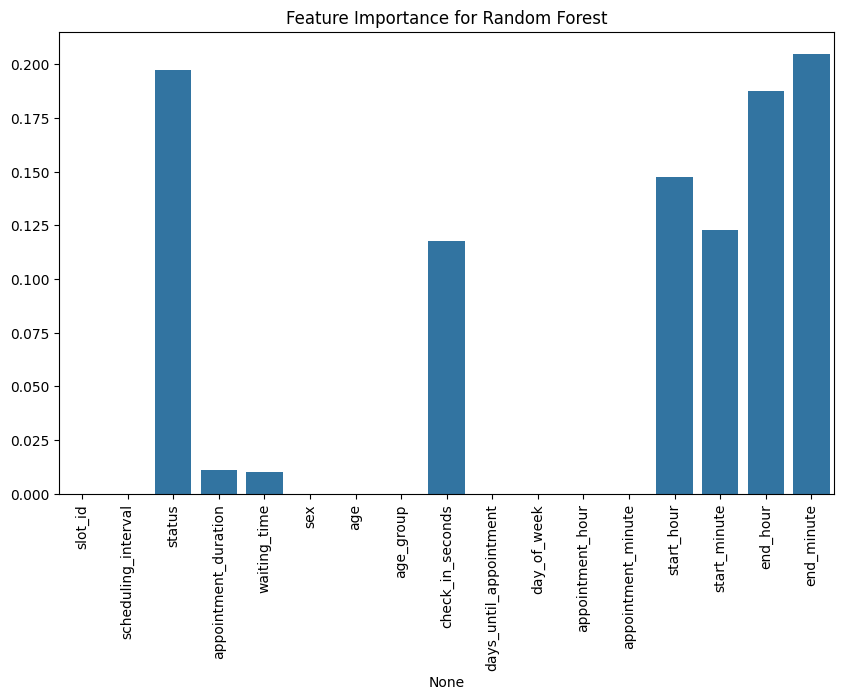

In [ ]:
# Feature importance for Decision Tree
dt_feature_importance = dt_classifier.feature_importances_

# Feature importance for Random Forest
rf_feature_importance = rf_classifier.feature_importances_

# Plot Feature Importance for Decision Tree
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=dt_feature_importance)
plt.title('Feature Importance for Decision Tree')
plt.xticks(rotation=90)
plt.show()

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=rf_feature_importance)
plt.title('Feature Importance for Random Forest')
plt.xticks(rotation=90)
plt.show()


# **Evaluation Comparison**

In [25]:
# Print comparison of classification reports for each model
print("Classification Report Comparison:")
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix comparison
print("Confusion Matrix Comparison:")
print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report Comparison:
Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       1.00      1.00      1.00     17070

    accuracy                           1.00     22298
   macro avg       1.00      1.00      1.00     22298
weighted avg       1.00      1.00      1.00     22298

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       1.00      1.00      1.00     17070

    accuracy                           1.00     22298
   macro avg       1.00      1.00      1.00     22298
weighted avg       1.00      1.00      1.00     22298

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       1.00      1.00      1.00     17070

    accuracy                           1.00     22298
   macro avg       1.00      1.00      1.00

# **Hyperparameter Tuning for the Models**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Step 1: Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split
}


# Step 2: Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Step 3: Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
rf_random_search.fit(X_train, y_train)

# Step 4: Get the best parameters
print("Best parameters found: ", rf_random_search.best_params_)

# Step 5: Train the model with the best parameters
best_rf_model = rf_random_search.best_estimator_

# Step 6: Evaluate the model
y_pred_rf = best_rf_model.predict(X_test)

# Print classification report and confusion matrix for Random Forest
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Best parameters found:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       1.00      1.00      1.00     17070

    accuracy                           1.00     22298
   macro avg       1.00      1.00      1.00     22298
weighted avg       1.00      1.00      1.00     22298

Confusion Matrix for Random Forest:
[[ 5228     0]
 [    0 17070]]


# **Hyperparameter Tuning for Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Step 1: Define the hyperparameter grid
param_dist = {
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split
}

# Step 2: Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 3: Perform RandomizedSearchCV
dt_random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
dt_random_search.fit(X_train, y_train)

# Step 4: Get the best parameters
print("Best parameters found for Decision Tree: ", dt_random_search.best_params_)

# Step 5: Train the model with the best parameters
best_dt_model = dt_random_search.best_estimator_

# Step 6: Evaluate the model
y_pred_dt = best_dt_model.predict(X_test)

# Print classification report and confusion matrix for Decision Tree
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))


Best parameters found for Decision Tree:  {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       1.00      1.00      1.00     17070

    accuracy                           1.00     22298
   macro avg       1.00      1.00      1.00     22298
weighted avg       1.00      1.00      1.00     22298

Confusion Matrix for Decision Tree:
[[ 5228     0]
 [    0 17070]]


# **Comparison table with accuracy, precision, recall, and F1-score for each model**

In [30]:
# Get classification report for Decision Tree
from sklearn.metrics import classification_report
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)

# Get classification report for Random Forest
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Create a comparison table
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_report['accuracy'], rf_report['accuracy']],
    'Precision': [dt_report['weighted avg']['precision'], rf_report['weighted avg']['precision']],
    'Recall': [dt_report['weighted avg']['recall'], rf_report['weighted avg']['recall']],
    'F1-Score': [dt_report['weighted avg']['f1-score'], rf_report['weighted avg']['f1-score']]
})

print(comparison_df)


           Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree       1.0        1.0     1.0       1.0
1  Random Forest       1.0        1.0     1.0       1.0


# **Plot the ROC Curve and Calculate AUC**

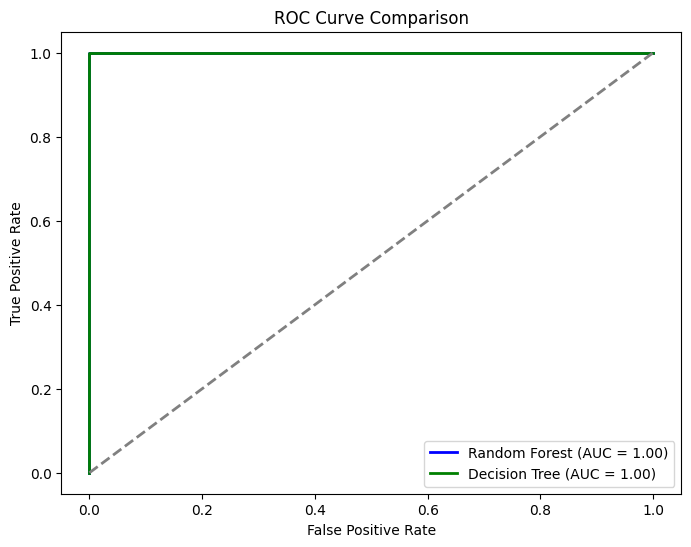

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For Random Forest
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# For Decision Tree
y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


# **Cross-Validation:**

In [35]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for Decision Tree
dt_cv_scores = cross_val_score(best_dt_model, X, y, cv=5, scoring='accuracy')  # Use 'accuracy' as the evaluation metric

# Print the cross-validation scores and the mean score
print(f"Cross-validation scores for Decision Tree: {dt_cv_scores}")
print(f"Mean cross-validation accuracy for Decision Tree: {dt_cv_scores.mean()}")





Cross-validation scores for Decision Tree: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy for Decision Tree: 1.0


In [36]:
# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')  # Use 'accuracy' as the evaluation metric

# Print the cross-validation scores and the mean score
print(f"Cross-validation scores for Random Forest: {rf_cv_scores}")
print(f"Mean cross-validation accuracy for Random Forest: {rf_cv_scores.mean()}")


Cross-validation scores for Random Forest: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy for Random Forest: 1.0


# **Confusion Matrix for Decision Tree and Random Forest**

In [37]:
from sklearn.metrics import confusion_matrix

# For Decision Tree
dt_cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(dt_cm)

# For Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(rf_cm)


Confusion Matrix for Decision Tree:
[[ 5228     0]
 [    0 17070]]
Confusion Matrix for Random Forest:
[[ 5228     0]
 [    0 17070]]
